In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '31e1f021-d108-4d24-a54e-3b0d6286ca3b',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-10-26T13:59:05.049Z', 'error_code': 0, 'error_message': None, 'elapsed': 44, 'credit_count': 1, 'notice': None, 'total_count': 9863}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11788, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [3]:
type(data)

dict

In [5]:
import pandas as pd


#See all the columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11788,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.977326e+07,1.977326e+07,False,NaN,1,NaN,NaN,None,2024-10-26T13:57:00.000Z,66856.022913,3.859633e+10,28.7451,-0.128022,-1.970906,-1.842906,3.876700,7.312166,-1.692208,1.321962e+12,58.2385,1.403976e+12,None,2024-10-26T13:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-26 16:59:12.687480
1,1027,Ethereum,ETH,ethereum,9450,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.203993e+08,1.203993e+08,True,NaN,2,NaN,NaN,None,2024-10-26T13:57:00.000Z,2464.057311,2.117075e+10,27.0526,-0.191181,-3.227241,-6.532836,-5.921297,-5.755328,-24.779253,2.966707e+11,13.0697,2.966707e+11,None,2024-10-26T13:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-26 16:59:12.687480
2,825,Tether USDt,USDT,tether,101582,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.203045e+11,1.213379e+11,True,NaN,3,NaN,NaN,None,2024-10-26T13:56:00.000Z,0.998720,7.477038e+10,32.6200,0.000773,-0.068594,-0.124557,-0.144695,-0.139007,-0.121315,1.201504e+11,5.2896,1.211826e+11,None,2024-10-26T13:56:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-26 16:59:12.687480
3,1839,BNB,BNB,bnb,2271,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459312e+08,1.459312e+08,False,NaN,4,NaN,NaN,None,2024-10-26T13:56:00.000Z,580.315654,1.713114e+09,14.7866,-0.465811,-1.964980,-2.701969,-2.101571,4.400169,-0.299564,8.468613e+10,3.7283,8.468613e+10,None,2024-10-26T13:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-26 16:59:12.687480
4,5426,Solana,SOL,solana,774,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.701959e+08,5.872580e+08,True,NaN,5,NaN,NaN,None,2024-10-26T13:56:00.000Z,168.061327,4.858859e+09,47.5175,-0.493256,-3.595915,8.546073,10.768371,8.483293,-9.844958,7.902175e+10,3.4789,9.869536e+10,None,2024-10-26T13:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-26 16:59:12.687480
5,3408,USDC,USDC,usd-coin,22671,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.468540e+10,3.468540e+10,False,NaN,6,NaN,NaN,None,2024-10-26T13:56:00.000Z,0.999849,9.429359e+09,36.9800,0.004008,-0.005706,-0.012615,-0.033495,-0.018198,-0.006380,3.468018e+10,1.5268,3.468018e+10,None,2024-10-26T13:56:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-26 16:59:12.687480
6,52,XRP,XRP,xrp,1411,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.681186e+10,9.998707e+10,False,NaN,7,NaN,NaN,None,2024-10-26T13:56:00.000Z,0.510815,1.290135e+09,60.8117,-0.605300,-2.633073,-6.160366,-13.265045,-13.994802,-15.142837,2.902032e+10,1.2778,5.108145e+10,None,2024-10-26T13:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-26 16:59:12.687480
7,74,Dogecoin,DOGE,dogecoin,1088,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.465281e+11,1.465281e+11,True,NaN,8,NaN,NaN,None,2024-10-26T13:56:00.000Z,0.133472,1.359964e+09,9.1728,-0.777690,-3.397658,-7.836575,16.676544,27.907745,2.019461,1.955733e+10,0.8610,1.955733e+10,None,2024-10-26T13:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-26 16:59:12.687480
8,1958,TRON,TRX,tron,1058,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,8.648639

In [9]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '31e1f021-d108-4d24-a54e-3b0d6286ca3b',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    

    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = pd.concat([df, df2], ignore_index=True)

In [ ]:
import os 
from time import time
from time import sleep

# max per day = 333
for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60)
exit()

In [9]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11788,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.977326e+07,1.977326e+07,False,NaN,1,NaN,NaN,None,2024-10-26T13:57:00.000Z,66856.022913,3.859633e+10,28.7451,-0.128022,-1.970906,-1.842906,3.876700,7.312166,-1.692208,1.321962e+12,58.2385,1.403976e+12,None,2024-10-26T13:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-26 16:59:12.687480
1,1027,Ethereum,ETH,ethereum,9450,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.203993e+08,1.203993e+08,True,NaN,2,NaN,NaN,None,2024-10-26T13:57:00.000Z,2464.057311,2.117075e+10,27.0526,-0.191181,-3.227241,-6.532836,-5.921297,-5.755328,-24.779253,2.966707e+11,13.0697,2.966707e+11,None,2024-10-26T13:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-26 16:59:12.687480
2,825,Tether USDt,USDT,tether,101582,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.203045e+11,1.213379e+11,True,NaN,3,NaN,NaN,None,2024-10-26T13:56:00.000Z,0.998720,7.477038e+10,32.6200,0.000773,-0.068594,-0.124557,-0.144695,-0.139007,-0.121315,1.201504e+11,5.2896,1.211826e+11,None,2024-10-26T13:56:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-26 16:59:12.687480
3,1839,BNB,BNB,bnb,2271,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459312e+08,1.459312e+08,False,NaN,4,NaN,NaN,None,2024-10-26T13:56:00.000Z,580.315654,1.713114e+09,14.7866,-0.465811,-1.964980,-2.701969,-2.101571,4.400169,-0.299564,8.468613e+10,3.7283,8.468613e+10,None,2024-10-26T13:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-26 16:59:12.687480
4,5426,Solana,SOL,solana,774,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.701959e+08,5.872580e+08,True,NaN,5,NaN,NaN,None,2024-10-26T13:56:00.000Z,168.061327,4.858859e+09,47.5175,-0.493256,-3.595915,8.546073,10.768371,8.483293,-9.844958,7.902175e+10,3.4789,9.869536e+10,None,2024-10-26T13:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-26 16:59:12.687480
5,3408,USDC,USDC,usd-coin,22671,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.468540e+10,3.468540e+10,False,NaN,6,NaN,NaN,None,2024-10-26T13:56:00.000Z,0.999849,9.429359e+09,36.9800,0.004008,-0.005706,-0.012615,-0.033495,-0.018198,-0.006380,3.468018e+10,1.5268,3.468018e+10,None,2024-10-26T13:56:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-26 16:59:12.687480
6,52,XRP,XRP,xrp,1411,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.681186e+10,9.998707e+10,False,NaN,7,NaN,NaN,None,2024-10-26T13:56:00.000Z,0.510815,1.290135e+09,60.8117,-0.605300,-2.633073,-6.160366,-13.265045,-13.994802,-15.142837,2.902032e+10,1.2778,5.108145e+10,None,2024-10-26T13:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-26 16:59:12.687480
7,74,Dogecoin,DOGE,dogecoin,1088,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.465281e+11,1.465281e+11,True,NaN,8,NaN,NaN,None,2024-10-26T13:56:00.000Z,0.133472,1.359964e+09,9.1728,-0.777690,-3.397658,-7.836575,16.676544,27.907745,2.019461,1.955733e+10,0.8610,1.955733e+10,None,2024-10-26T13:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-26 16:59:12.687480
8,1958,TRON,TRX,tron,1058,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,8.648639

In [11]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11788,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19773265.00000,19773265.00000,False,NaN,1,NaN,NaN,None,2024-10-26T13:57:00.000Z,66856.02291,38596325500.92779,28.74510,-0.12802,-1.97091,-1.84291,3.87670,7.31217,-1.69221,1321961857904.41992,58.23850,1403976481172.57007,None,2024-10-26T13:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-26 16:59:12.687480
1,1027,Ethereum,ETH,ethereum,9450,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120399251.19061,120399251.19061,True,NaN,2,NaN,NaN,None,2024-10-26T13:57:00.000Z,2464.05731,21170745480.38974,27.05260,-0.19118,-3.22724,-6.53284,-5.92130,-5.75533,-24.77925,296670655178.59229,13.06970,296670655178.59003,None,2024-10-26T13:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-26 16:59:12.687480
2,825,Tether USDt,USDT,tether,101582,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,120304469780.02702,121337925865.33360,True,NaN,3,NaN,NaN,None,2024-10-26T13:56:00.000Z,0.99872,74770377043.16022,32.62000,0.00077,-0.06859,-0.12456,-0.14470,-0.13901,-0.12132,120150431732.70226,5.28960,121182564579.08000,None,2024-10-26T13:56:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-26 16:59:12.687480
3,1839,BNB,BNB,bnb,2271,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145931156.82618,145931156.82618,False,NaN,4,NaN,NaN,None,2024-10-26T13:56:00.000Z,580.31565,1713114083.96186,14.78660,-0.46581,-1.96498,-2.70197,-2.10157,4.40017,-0.29956,84686134766.01799,3.72830,84686134766.02000,None,2024-10-26T13:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-26 16:59:12.687480
4,5426,Solana,SOL,solana,774,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,470195908.16925,587258012.97414,True,NaN,5,NaN,NaN,None,2024-10-26T13:56:00.000Z,168.06133,4858858964.35888,47.51750,-0.49326,-3.59591,8.54607,10.76837,8.48329,-9.84496,79021748292.96049,3.47890,98695360971.88000,None,2024-10-26T13:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-26 16:59:12.687480
5,3408,USDC,USDC,usd-coin,22671,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,34685401489.12111,34685401489.12111,False,NaN,6,NaN,NaN,None,2024-10-26T13:56:00.000Z,0.99985,9429359422.59828,36.98000,0.00401,-0.00571,-0.01261,-0.03350,-0.01820,-0.00638,34680180982.83368,1.52680,34680180982.83000,None,2024-10-26T13:56:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-26 16:59:12.687480
6,52,XRP,XRP,xrp,1411,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,56811862950.00000,99987068281.00000,False,NaN,7,NaN,NaN,None,2024-10-26T13:56:00.000Z,0.51081,1290135069.62919,60.81170,-0.60530,-2.63307,-6.16037,-13.26504,-13.99480,-15.14284,29020323658.24170,1.27780,51081450512.87000,None,2024-10-26T13:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-26 16:59:12.687480
7,74,Dogecoin,DOGE,dogecoin,1088,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,146528146383.70523,146528146383.70523,True,NaN,8,NaN,NaN,None,2024-10-26T13:56:00.000Z,0.13347,1359963674.93037,9.17280,-0.77769,-3.39766,-7.83657,16.67654,27.90774,2.01946,19557334673.39315,0.86100,19557334673.39000,None,2024-10-26T13:56:00.00

In [13]:
# Сoin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.12802,-1.97091,-1.84291,3.87670,7.31217,-1.69221
Ethereum,-0.19118,-3.22724,-6.53284,-5.92130,-5.75533,-24.77925
Tether USDt,0.00077,-0.06859,-0.12456,-0.14470,-0.13901,-0.12132
BNB,-0.46581,-1.96498,-2.70197,-2.10157,4.40017,-0.29956
Solana,-0.49326,-3.59591,8.54607,10.76837,8.48329,-9.84496
USDC,0.00401,-0.00571,-0.01261,-0.03350,-0.01820,-0.00638
XRP,-0.60530,-2.63307,-6.16037,-13.26504,-13.99480,-15.14284
Dogecoin,-0.77769,-3.39766,-7.83657,16.67654,27.90774,2.01946
TRON,0.10928,-1.05555,4.49312,8.11838,2.21929,19.82711


In [15]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.12802
              quote.USD.percent_change_24h    -1.97091
              quote.USD.percent_change_7d     -1.84291
              quote.USD.percent_change_30d     3.87670
              quote.USD.percent_change_60d     7.31217
              quote.USD.percent_change_90d    -1.69221
Ethereum      quote.USD.percent_change_1h     -0.19118
              quote.USD.percent_change_24h    -3.22724
              quote.USD.percent_change_7d     -6.53284
              quote.USD.percent_change_30d    -5.92130
              quote.USD.percent_change_60d    -5.75533
              quote.USD.percent_change_90d   -24.77925
Tether USDt   quote.USD.percent_change_1h      0.00077
              quote.USD.percent_change_24h    -0.06859
              quote.USD.percent_change_7d     -0.12456
              quote.USD.percent_change_30d    -0.14470
              quote.USD.percent_change_60d    -0.13901
              quote.US

In [17]:
type(df4)

pandas.core.series.Series

In [19]:
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h   -0.12802
             quote.USD.percent_change_24h  -1.97091
             quote.USD.percent_change_7d   -1.84291
             quote.USD.percent_change_30d   3.87670
             quote.USD.percent_change_60d   7.31217
             quote.USD.percent_change_90d  -1.69221
Ethereum     quote.USD.percent_change_1h   -0.19118
             quote.USD.percent_change_24h  -3.22724
             quote.USD.percent_change_7d   -6.53284
             quote.USD.percent_change_30d  -5.92130
             quote.USD.percent_change_60d  -5.75533
             quote.USD.percent_change_90d -24.77925
Tether USDt  quote.USD.percent_change_1h    0.00077
             quote.USD.percent_change_24h  -0.06859
             quote.USD.percent_change_7d   -0.12456
             quote.USD.percent_change_30d  -0.14470
             quote.USD.percent_change_60d  -0.13901
             quote.USD.percent_change_90d  -0.12132
BNB          quote.USD.percent_change_1h   -0.46581
             quote.USD.percent_change_24h  -1.96498
             quote.USD.percent_change_7d   -2.70197
             quote.USD.percent_change_30d  -2.10157
             quote.USD.percent_change_60d   4.40017
             quote.USD.percent_change_90d  -0.29956
Solana       quote.USD.percent_change_1h   -0.49326
             quote.USD.percent_change_24h  -3.59591
             quote.USD.percent_change_7d    8.54607
             quote.USD.percent_change_30d  10.76837
             quote.USD.percent_change_60d   8.48329
             quote.USD.percent_change_90d  -9.84496
USDC         quote.USD.percent_change_1h    0.00401
             quote.USD.percent_change_24h  -0.00571
             quote.USD.percent_change_7d   -0.01261
             quote.USD.percent_change_30d  -0.03350
             quote.USD.percent_change_60d  -0.01820
             quote.USD.percent_change_90d  -0.00638
XRP          quote.USD.percent_change_1h   -0.60530
             quote.USD.percent_change_24h  -2.63307
             quote.USD.percent_change_7d   -6.16037
             quote.USD.percent_change_30d -13.26504
             quote.USD.percent_change_60d -13.99480
             quote.USD.percent_change_90d -15.14284
Dogecoin     quote.USD.percent_change_1h   -0.77769
             quote.USD.percent_change_24h  -3.39766
             quote.USD.percent_change_7d   -7.83657
             quote.USD.percent_change_30d  16.67654
             quote.USD.percent_change_60d  27.90774
             quote.USD.percent_change_90d   2.01946
TRON         quote.USD.percent_change_1h    0.10928
             quote.USD.percent_change_24h  -1.05555
             quote.USD.percent_change_7d    4.49312
             quote.USD.percent_change_30d   8.11838
             quote.USD.percent_change_60d   2.21929
             quote.USD.percent_change_90d  19.82711
Toncoin      quote.USD.percent_change_1h   -0.52008
             quote.USD.percent_change_24h  -2.76016
             quote.USD.percent_change_7d   -6.54950
             quote.USD.percent_change_30d -15.41111
             quote.USD.percent_change_60d -10.61089
             quote.USD.percent_change_90d -25.25705
Cardano      quote.USD.percent_change_1h   -0.57076
             quote.USD.percent_change_24h  -4.91495
             quote.USD.percent_change_7d   -6.35979
             quote.USD.percent_change_30d -17.15621
             quote.USD.percent_change_60d -10.07352
             quote.USD.percent_change_90d -20.26207
Avalanche    quote.USD.percent_change_1h   -1.06524
             quote.USD.percent_change_24h  -4.58159
             quote.USD.percent_change_7d   -9.25501
             quote.USD.percent_change_30d -11.14631
             quote.USD.percent_change_60d  -1.71454
             quote.USD.percent_change_90d  -8.37435
Shiba Inu    quote.USD.percent_change_1h   -0.80528
             quote.USD.percent_change_24h  -4.92836
             quote.USD.percent_change_7d  -12.34429
             quote.USD.percent_change_30d

In [21]:
df5.count()

values    90
dtype: int64

In [23]:
# Set the DataFrame index object as the index

index = pd.Index(range(90))
df6 = df5.reset_index()
df6


,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.12802
1,Bitcoin,quote.USD.percent_change_24h,-1.97091
2,Bitcoin,quote.USD.percent_change_7d,-1.84291
3,Bitcoin,quote.USD.percent_change_30d,3.87670
4,Bitcoin,quote.USD.percent_change_60d,7.31217
5,Bitcoin,quote.USD.percent_change_90d,-1.69221
6,Ethereum,quote.USD.percent_change_1h,-0.19118
7,Ethereum,quote.USD.percent_change_24h,-3.22724
8,Ethereum,quote.USD.percent_change_7d,-6.53284
9,Ethereum,quote.USD.percent_change_30d,-5.92130


In [25]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.12802
1,Bitcoin,quote.USD.percent_change_24h,-1.97091
2,Bitcoin,quote.USD.percent_change_7d,-1.84291
3,Bitcoin,quote.USD.percent_change_30d,3.87670
4,Bitcoin,quote.USD.percent_change_60d,7.31217
5,Bitcoin,quote.USD.percent_change_90d,-1.69221
6,Ethereum,quote.USD.percent_change_1h,-0.19118
7,Ethereum,quote.USD.percent_change_24h,-3.22724
8,Ethereum,quote.USD.percent_change_7d,-6.53284
9,Ethereum,quote.USD.percent_change_30d,-5.92130


In [27]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.12802
1,Bitcoin,24h,-1.97091
2,Bitcoin,7d,-1.84291
3,Bitcoin,30d,3.87670
4,Bitcoin,60d,7.31217
5,Bitcoin,90d,-1.69221
6,Ethereum,1h,-0.19118
7,Ethereum,24h,-3.22724
8,Ethereum,7d,-6.53284
9,Ethereum,30d,-5.92130


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

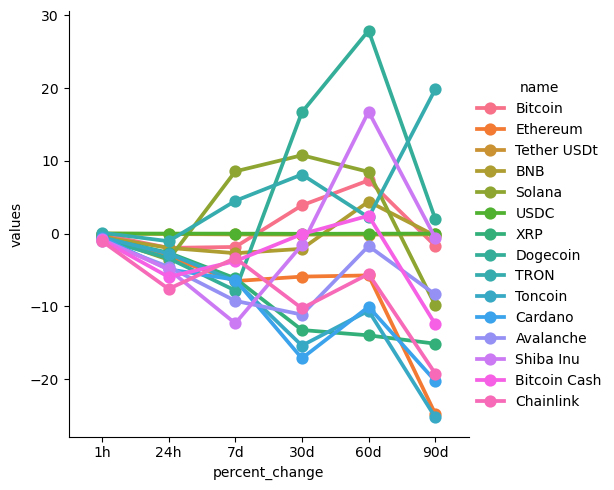

In [30]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [33]:
# Create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,66856.02291,2024-10-26 16:59:12.687480


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

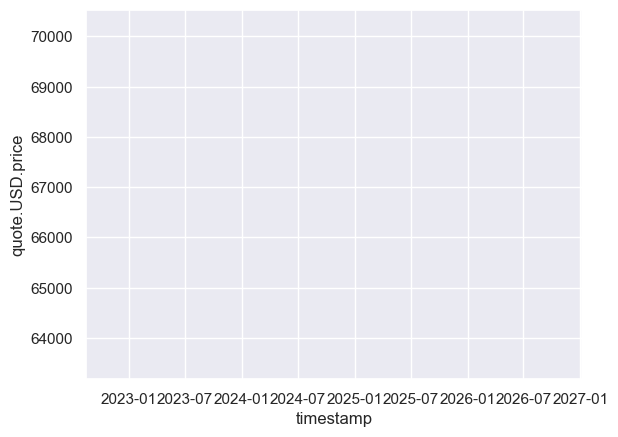

In [35]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)